# <b>FIFA 19 Data Analysis</b>

## Overview

FIFA 19 è un videogioco di calcio sviluppato da EA Sports, pubblicato il 28 settembre 2018 per PlayStation 3 (con supporto PlayStation Move), PlayStation 4, Xbox 360, Xbox One (con Kinect), Microsoft Windows e Nintendo Switch.

In questa analisi studieremo il valore dei giocatori presenti nel dataset, come esso varia all'interno della popolazione, se (ed eventualmente come) è possibile calcolare il valore di un giocatore e proveremo a classificare i giocatori per mentalità (difensiva o offensiva).

## Librerie

Importiamo le librerie che useremo nelle nostre analisi sul dataset.

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data statistics
from scipy.stats import norm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

## Dataset

Utilizzeremo un dataset contenente le informazioni di tutti i calciatori presenti sul gioco FIFA19. Il dataset è disponibile su Kaggle all'indirizzo https://www.kaggle.com/dczerniawko/fifa19-analysis.

In [2]:
# Load dataset
original_data = pd.read_csv('input/data.csv', index_col='Unnamed: 0')
# Show dataset info
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

Il dataset contiene 18207 osservazioni ed 88 colonne: id, nome, eta, foto, nazione, bandiera, valore complessivo (overall), potenziale, club, lodo del club, valore di mercato, piede preferito, reputazione internazionale (valore da 1 a 5), piede debole (valore da 1 a 5), mosse di abilità (valore da 1 a 5), ecc...

Dato che alcuni campi non saranno oggetto della nostra analisi, effettuiamo un drop delle colonne superflue quindi mostriamo i primi 5 record.

In [3]:
# Copy dataset
data = original_data.copy()
#data['international_reputation'] = data['international Reputation']
# Drop unused columns
data = data.drop(['ID', 'Photo', 'Flag', 'Club Logo', 'Real Face', 'Loaned From'], 1)
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('\'','').str.replace('-','_').str.replace('&','_')
# Show the first five rows
data.head()

,name,age,nationality,overall,potential,club,value,wage,special,preferred_foot,...,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release_clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Analisi quantitativa

Visualizzamo la distribuzione del valore complessivo dei giocatori.

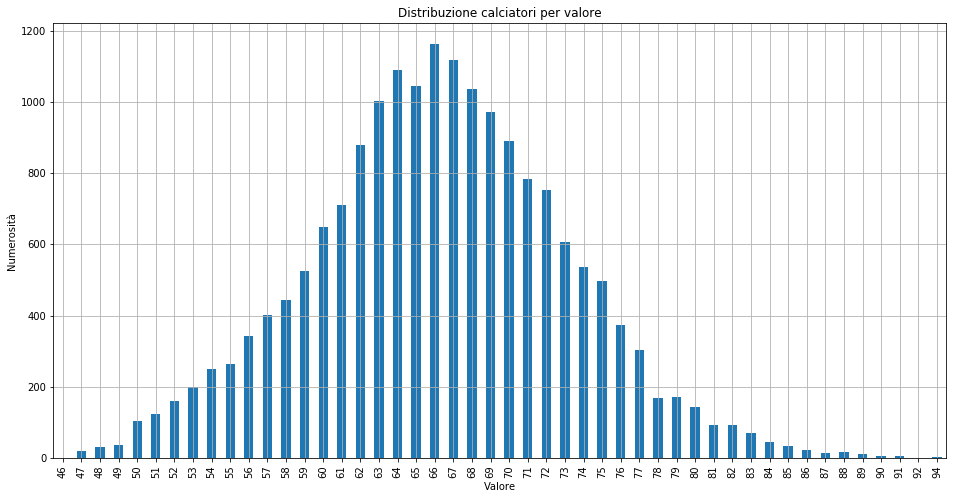

In [4]:
# overall players distribution
data['overall'].value_counts().sort_index().plot.bar(figsize=(16,8))
plt.title('Distribuzione calciatori per valore')
plt.xlabel('Valore')
plt.ylabel('Numerosità')
plt.grid()
plt.show()

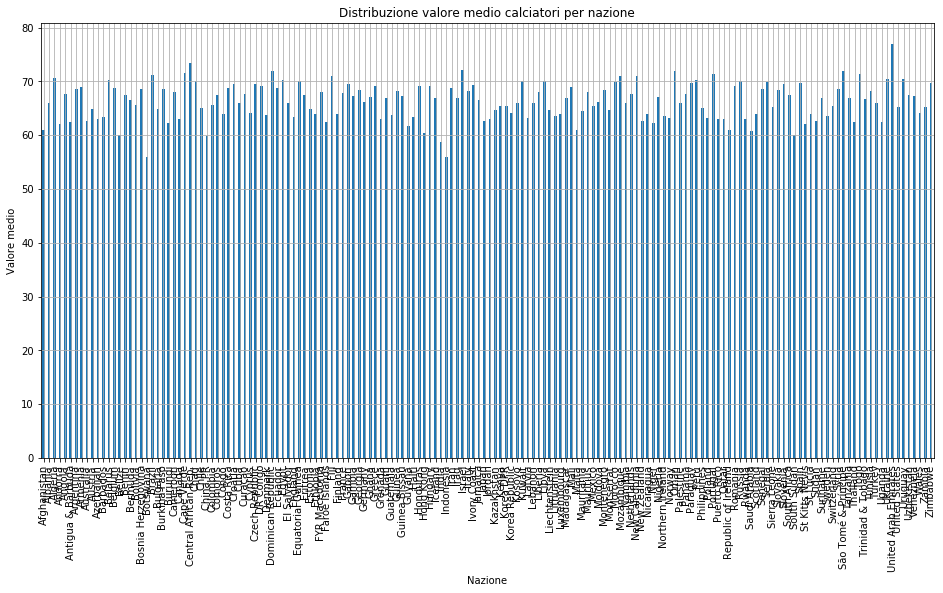

In [5]:
# overall players distribution for nation
data.groupby('nationality')['overall'].mean().plot.bar(figsize=(16,8))
plt.title('Distribuzione valore medio calciatori per nazione')
plt.xlabel('Nazione')
plt.ylabel('Valore medio')
plt.grid()
plt.show()

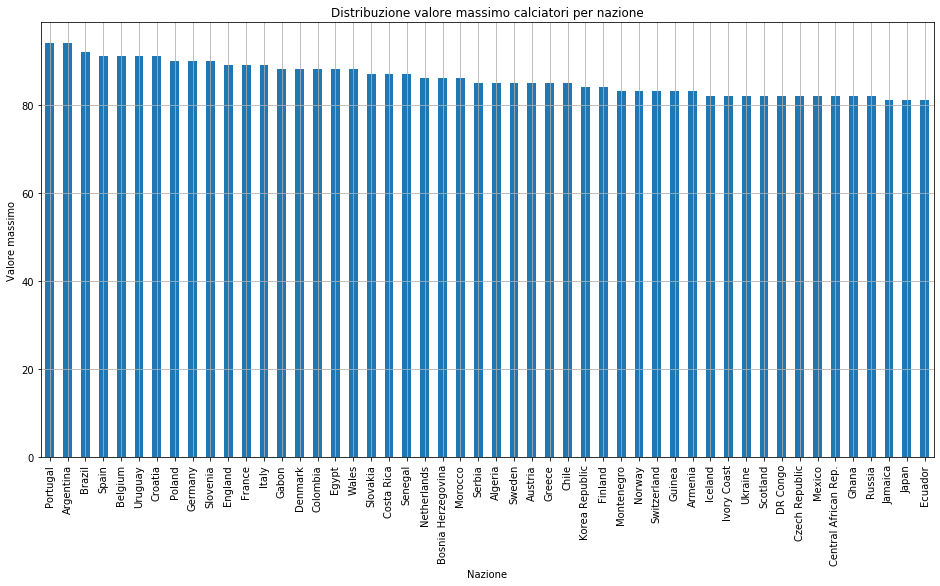

In [6]:
# Top 50 nations for max overall
data.groupby('nationality')['overall'].max().sort_values(ascending=False)[0:50].plot.bar(figsize=(16,8))
plt.title('Distribuzione valore massimo calciatori per nazione')
plt.xlabel('Nazione')
plt.ylabel('Valore massimo')
plt.grid()
plt.show()

In [7]:
# Top 50 nations for max overall
data.groupby('nationality')['overall'].max().sort_values(ascending=False)[0:50]

nationality
Portugal                94
Argentina               94
Brazil                  92
Spain                   91
Belgium                 91
Uruguay                 91
Croatia                 91
Poland                  90
Germany                 90
Slovenia                90
England                 89
France                  89
Italy                   89
Gabon                   88
Denmark                 88
Colombia                88
Egypt                   88
Wales                   88
Slovakia                87
Costa Rica              87
Senegal                 87
Netherlands             86
Bosnia Herzegovina      86
Morocco                 86
Serbia                  85
Algeria                 85
Sweden                  85
Austria                 85
Greece                  85
Chile                   85
Korea Republic          84
Finland                 84
Montenegro              83
Norway                  83
Switzerland             83
Guinea                  83
Armenia         

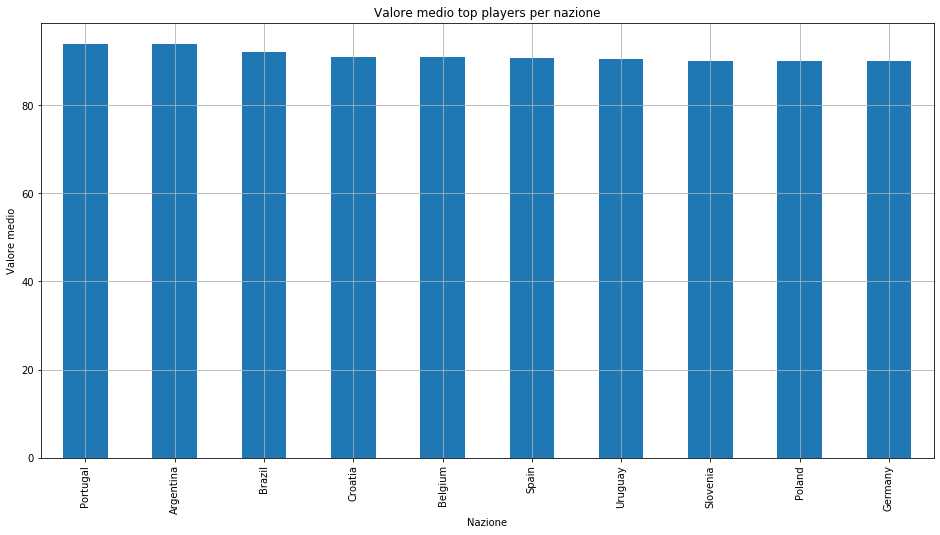

In [8]:
# Top 10 nations for mean overall
top_players_data = data[data['overall'] >= 90]
top_players_data.groupby('nationality')['overall'].mean().sort_values(ascending=False)[0:10].plot.bar(figsize=(16,8))
plt.title('Valore medio top players per nazione')
plt.xlabel('Nazione')
plt.ylabel('Valore medio')
plt.grid()
plt.show()

In [9]:
# Top players for nations 
top_players_data.groupby('nationality')['overall'].value_counts()

nationality  overall
Argentina    94         1
Belgium      91         2
Brazil       92         1
Croatia      91         1
Germany      90         1
Poland       90         1
Portugal     94         1
Slovenia     90         1
Spain        91         2
             90         1
Uruguay      90         1
             91         1
Name: overall, dtype: int64

Per una migliore visualizzazione dei risultati, normalizziamo il campo 'overall' in 0-1.

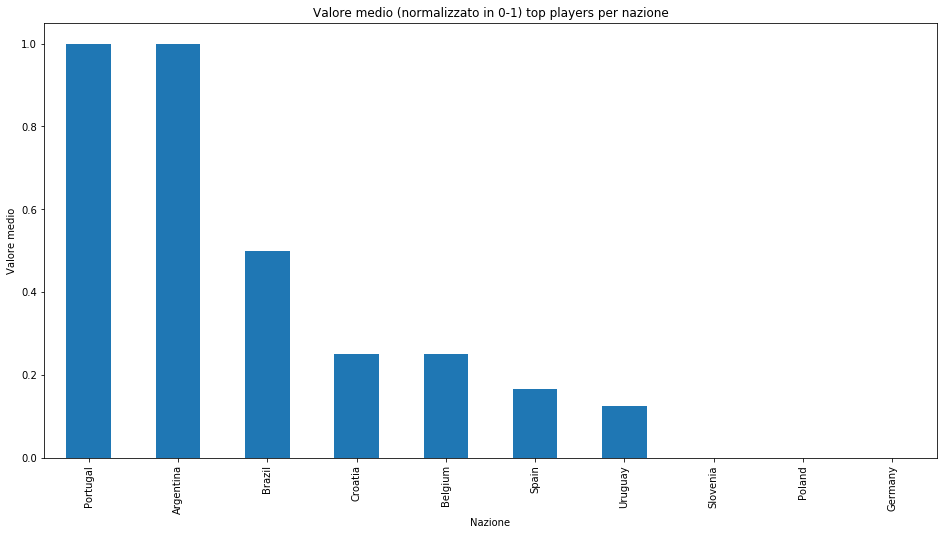

In [10]:
# Top 10 nations for mean overall (normalized version)
top_players_data_norm = data.copy()
top_players_data_norm['overall']  = (top_players_data['overall']-top_players_data['overall'].min())/(top_players_data['overall'].max()-top_players_data['overall'].min())
top_players_data_norm.groupby('nationality')['overall'].mean().sort_values(ascending=False)[0:10].plot.bar(figsize=(16,8))
plt.title('Valore medio (normalizzato in 0-1) top players per nazione')
plt.xlabel('Nazione')
plt.ylabel('Valore medio')
plt.show()

In [11]:
# Top players for nations (normalized version)
top_players_data_norm.groupby('nationality')['overall'].value_counts()

nationality  overall
Argentina    1.00       1
Belgium      0.25       2
Brazil       0.50       1
Croatia      0.25       1
Germany      0.00       1
Poland       0.00       1
Portugal     1.00       1
Slovenia     0.00       1
Spain        0.25       2
             0.00       1
Uruguay      0.00       1
             0.25       1
Name: overall, dtype: int64

In [12]:
# Nations with top players
top_players_nations = top_players_data['nationality'].unique().tolist()
top_players_nations

['Argentina',
 'Portugal',
 'Brazil',
 'Spain',
 'Belgium',
 'Croatia',
 'Uruguay',
 'Slovenia',
 'Poland',
 'Germany']

Dalle informazioni ottenute sui top player, possiamo affermare che le nazioni in cui è possibile trovarli sono unicamente 10 e che solo in Argentina ed in Portogallo si possono individuare calciatori con il valore massimo in circolazione.
Tali informazioni però risultano non esaustive qualora si vogliano cercare giocatori di ottimo profilo; cerchiamo dunque good players (calciatori con overall a partire da 80) nelle varie nazioni.

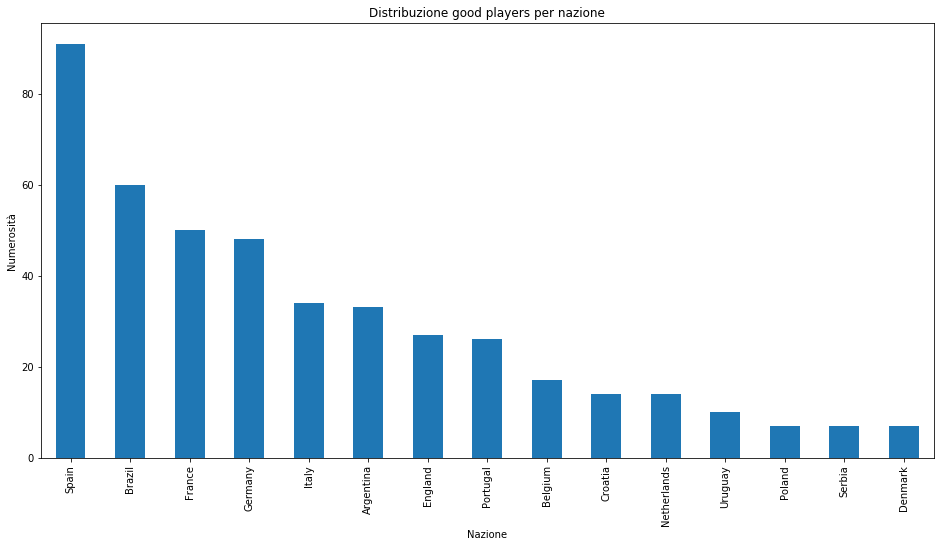

In [13]:
good_players_data = data[data['overall'] >= 80]
good_players_data['nationality'].value_counts().sort_values(ascending=False)[0:15].plot.bar(figsize=(16,8))
plt.title('Distribuzione good players per nazione')
plt.xlabel('Nazione')
plt.ylabel('Numerosità')
plt.show()

In [14]:
# Nations with good players
good_players_nations = good_players_data['nationality'].value_counts().sort_values(ascending=False)[0:15]
good_players_nations_list = good_players_nations.index.tolist() 
good_players_nations

Spain          91
Brazil         60
France         50
Germany        48
Italy          34
Argentina      33
England        27
Portugal       26
Belgium        17
Croatia        14
Netherlands    14
Uruguay        10
Poland          7
Serbia          7
Denmark         7
Name: nationality, dtype: int64

Come si può vedere dal precedente grafico a barre, le nazioni principali sono 15 e quella con il
maggior numero di good players è la Spagna.

A seguito di quanto sopra, qualora si volesse investire per la ricerca di un good players, sarebbe più utile considerare profili di nazionalità spagnola piuttosto che portoghese.

In [15]:
# Number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(data['nationality'].nunique()))
data['nationality'].value_counts().head(5)

# European Countries have most players

Total number of countries : 164


England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: nationality, dtype: int64

## Analisi popolazione

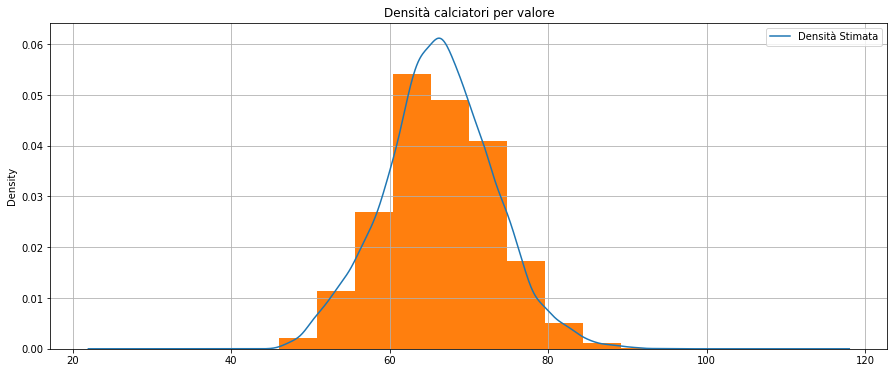

In [16]:
# overall players density
data['overall'].plot.density(figsize=(15,6))
plt.hist(data['overall'], density=True)
plt.title('Densità calciatori per valore')
plt.legend(['Densità Stimata'])
plt.grid()
plt.show()

In [17]:
data['overall'].describe()

count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: overall, dtype: float64

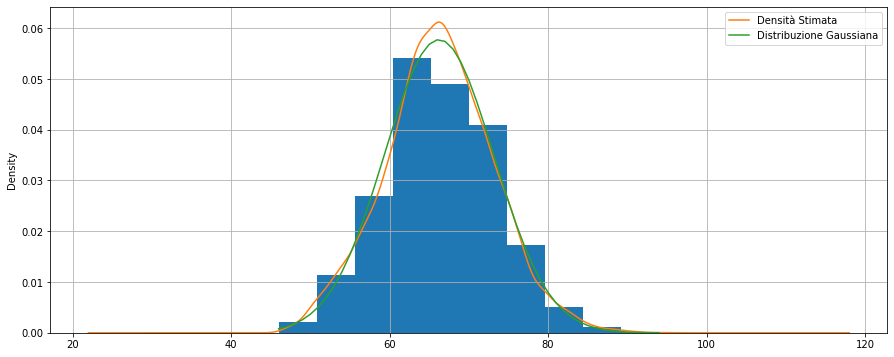

In [18]:
# overall players density
mu = data['overall'].mean()
sigma = data['overall'].std()

g = norm(mu,sigma)
x = data['overall'].unique()

plt.figure(figsize=(15,6))
data['overall'].plot.hist(density=True)
data['overall'].plot.density()
plt.plot(x,g.pdf(x))
plt.grid()
plt.legend(['Densità Stimata','Distribuzione Gaussiana'])
plt.show()

Come possiamo notare dal grafico precedente, i valori dei giocatori sembrano distribuirsi secondo una distribuzione Gaussiana di media 66.238699 e deviazione standard 6.908930.

Per completezza effettuiamo un plot della CDF.

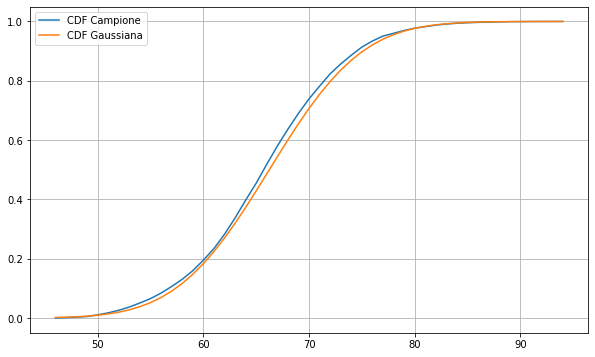

In [19]:
cdf_overall = data['overall'].value_counts(normalize=True).sort_index().cumsum()

plt.figure(figsize=(10,6))
cdf_overall.plot()
plt.plot(x,g.cdf(x))
plt.grid()
plt.legend(['CDF Campione','CDF Gaussiana'])
plt.show()

Il plot ci permette di fare alcune considerazioni qualitative sulle due distribuzioni; in particolare, le due CDF si "assomigliano" in modo significativo.

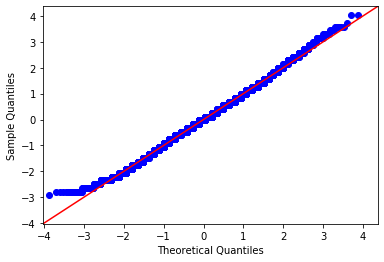

In [20]:
qqplot(data['overall'], fit=True, line='45')
plt.show()

Il plot mette in relazione i quantili "teorici" con quelli del campione. Il fatto che solo pochi punti del plot non giacciano sulla diagonale indica, lieve asimmetria sinistra, che c'è una minima discrepanza tra la distribuzione empirica dei dati e quella Gaussiana. 

A seguito dell'analisi mediante CDF e Q-Q plot, possiamo affermare che l'ipotesi secondo la quale i dati si distribuiscono con un andamento gaussiano è corretta.

Vediamo adesso qualche altra informazione sul valore dei calciatori presenti nel nostro dataset.

In [21]:
data['overall'].median()

66.0

In [22]:
data['overall'].mode()[0]

66

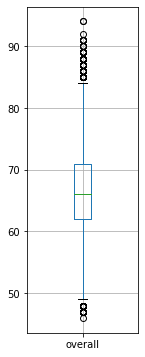

In [23]:
data['overall'].plot.box(figsize=(2,6))
plt.grid()
plt.show()

Come possiamo notare, i giocatori di ottimo livello (top e, alcuni, good players) sono veramente pochi e risultano essere degli outliers.

Diamo uno sguardo ai boxplot delle prime 15 nazioni per numero di good players.

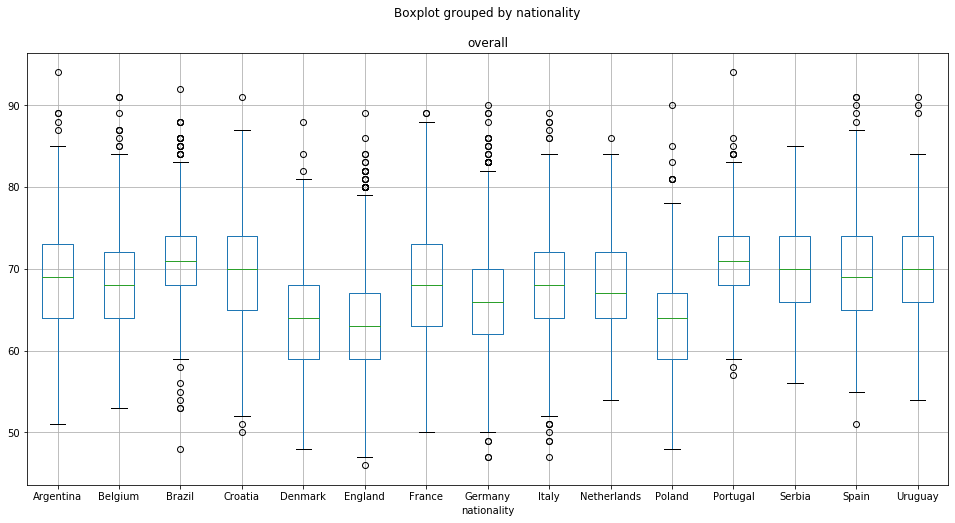

In [24]:
data_countries = data.loc[data['nationality'].isin(good_players_nations_list)]
data_countries.boxplot(by='nationality',column=['overall'], figsize=(16,8))

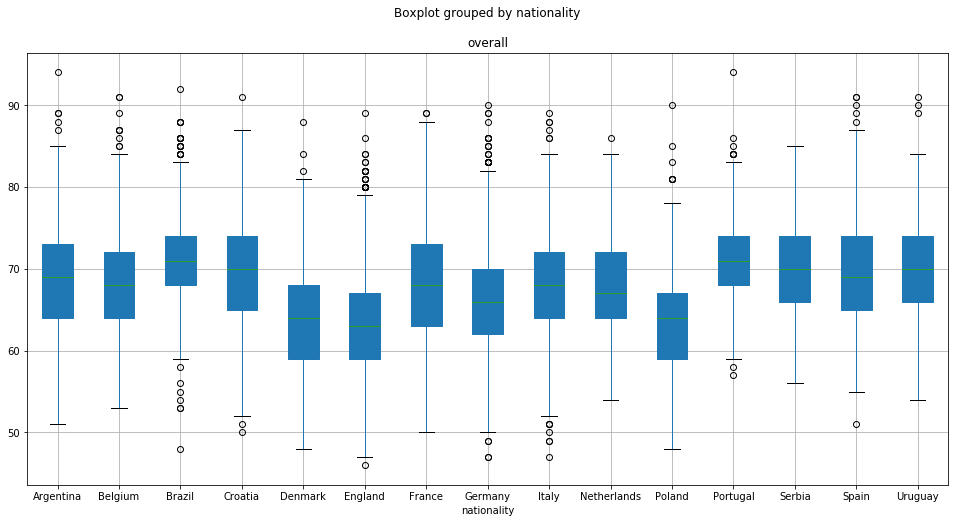

In [25]:
data_countries.boxplot(by='nationality', column=['overall'], patch_artist=True, figsize=(16,8))

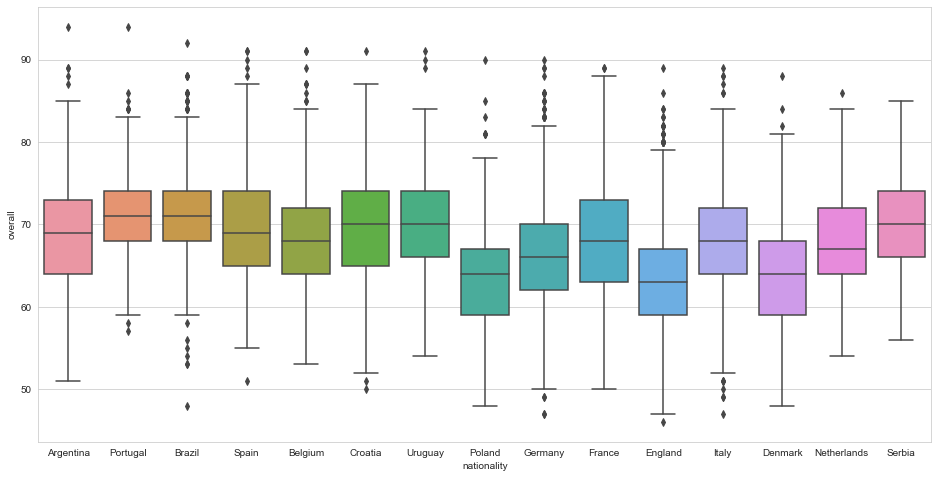

In [26]:
plt.rcParams['figure.figsize'] = (16, 8)
sns.set_style('whitegrid')
sns.boxplot(x = data_countries['nationality'], y = data_countries['overall'])

# Regressione Lineare

Adesso si proverà a calcolare una regressione lineare avendo come variabile dipendente overall e come variabili indipendenti: .....

## Preprocessing

Prima di calcolare la regressione effettuiamo una fase di preprocessing; vengono mantenuti solo ... e vengono rimosse tutte le colonne che non vengono usate.

In [27]:
# filling the missing value for the continous variables for proper data visualization
data['release_clause'].fillna('€0', inplace = True)
data['contract_valid_until'].fillna('2017', inplace = True)
data['international_reputation'].fillna(1, inplace = True)

In [28]:
# The value has some non numeric mark so I extract rigth value
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

data['market_value'] = data['value'].apply(value_to_int)
data['salary'] = data['wage'].apply(value_to_int)
data['release_clause'] = data['release_clause'].apply(value_to_int)
data.drop(['value','wage'], 1, inplace=True)

In [29]:
# The value has some non numeric mark so I extract rigth value
def date_to_int(df_value):
    try:
        value = int(df_value.split(", ", 1)[-1])
    except ValueError:
        value = 0
    return value

data['contract_valid_until'] = data['contract_valid_until'].apply(date_to_int)

In [30]:
data['contract_valid_until'].unique()

array([2021, 2022, 2020, 2023, 2019, 2024, 2025, 2026, 2018, 2017],
      dtype=int64)

In [31]:
#3/0

In [32]:
#data_lin_reg = data.copy()
#data_lin_reg.drop(data_lin_reg.columns.difference(['overall','age', 'potential', 'market_value', 'international_reputation']), 1, inplace=True)
#data_lin_reg.head()

Abbiamo apportato le opportune modifiche al dataset. Passiamo dunque ad analizzare la correlazione dei nostrri dati.

In [33]:
#sns.heatmap(data_lin_reg.corr())
#plt.show()

<Figure size 1440x1440 with 0 Axes>

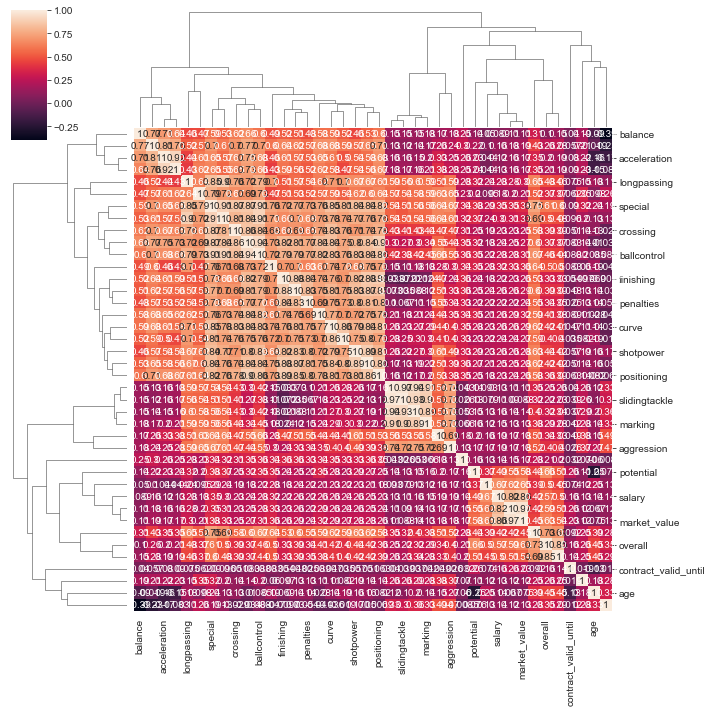

In [34]:
plt.figure(figsize=(20,20))
#sns.clustermap(data[list(data.columns.values)].corr(),annot = False);

#prefixes = ('gk', 'jersey')
prefixes = ('gk', 'jersey', 'name', 'nationality', 'club', 'preferred_foot', 'joined')
corr_list = list(data.columns.values)
for word in corr_list[:]:
    if word.startswith(prefixes):
        corr_list.remove(word)

sns.clustermap(data[corr_list].corr(),annot = False);

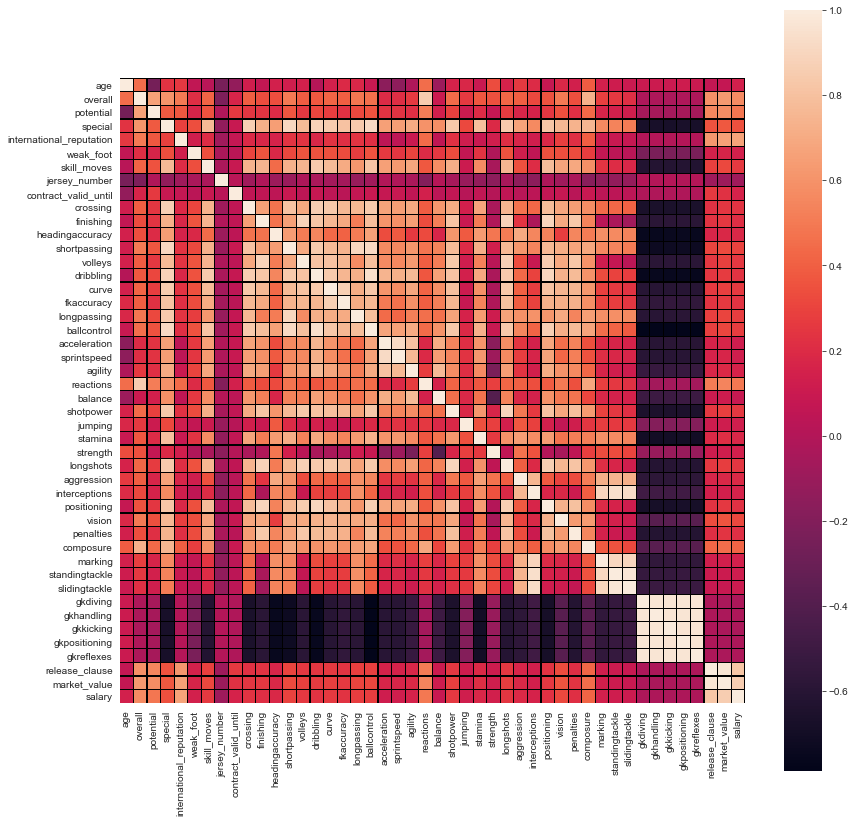

In [35]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), linewidths=0.1, linecolor='black', square=True)

Come possiamo notare dalla matrice di correlazione, esiste una forte correlazione tra le componenti che permettono di determinare l'abilità di un portiere.

Nonostante ciò, non ci soffermeremo a questa indagine bensì cercheremo, se esiste, una correlazione tra il valore di mercato di giocatori ed il loro valore (overall).

Dando un ulteriore sguardo sembrerebbe che il valore di mercato sia correlato in maniera moderata al valore del giocatore, al suo potenziale ed alla reputazione internazionale.

Proviamo a plottare il valore di mercato ed l'overall dei giocatori.

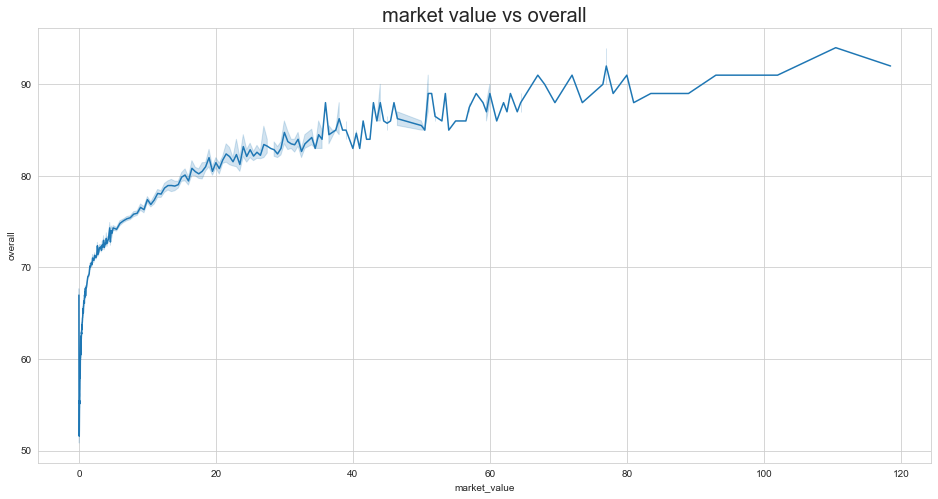

In [36]:
sns.lineplot(data['market_value'] / 1000000, data['overall'], palette = 'Wistia')
plt.title('market value vs overall', fontsize = 20)

plt.show()

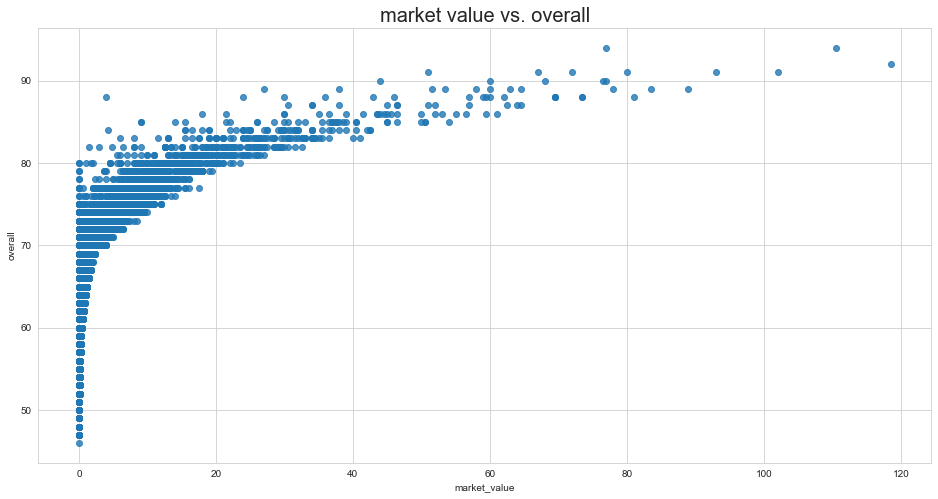

In [37]:
ax = sns.regplot(x = data['market_value'] / 1000000, y = data['overall'], fit_reg = False);
ax.set_title(label='market value vs. overall', fontsize=20);

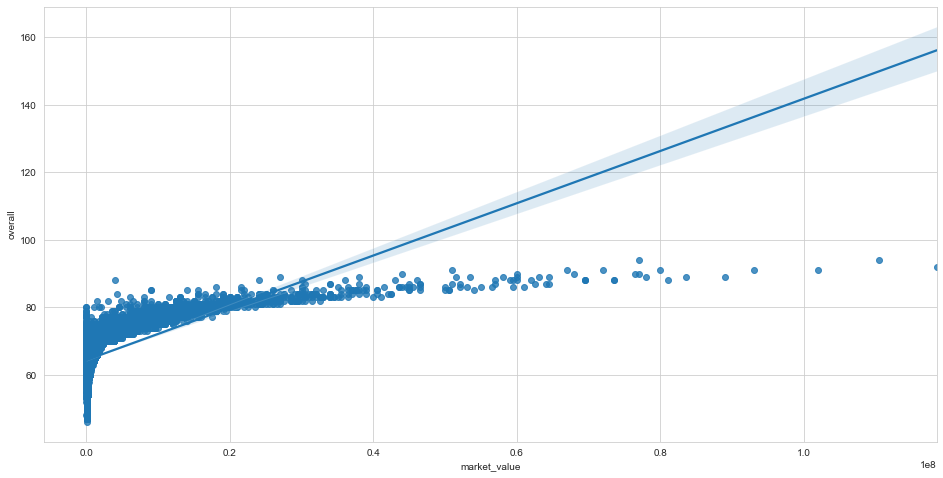

In [38]:
sns.regplot('market_value', 'overall', data)
plt.show()

In [39]:
model = ols("market_value ~ overall", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           market_value   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                 1.180e+04
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:13:32   Log-Likelihood:            -3.0417e+05
No. Observations:               18207   AIC:                         6.084e+05
Df Residuals:                   18205   BIC:                         6.084e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.123e+07   3.11e+05   -100.292      0.000   -3.18e+07   -3.06e+07
overall     5.078e+05   4675.184    108.621      0.000    4.99e+05    5.17e+05
==============================================================================
Omnibus:                    24549.234   Durbin-Watson:                   0.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8046817.791
Skew:                           7.632   Prob(JB):                         0.00
Kurtosis:                     104.853   Cond. No.                         642.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Come possiamo notare, un normale regressore lineare che prenda in input il solo valore del giocatore non è affidabile.

La regressione lineare multipla permette di studiare le relazioni tra una variabile dipendente e un insieme di variabili indipendenti. Proviamo a farne uso ed elaborare un modello capace di predire il prezzo di mercato.

In [40]:
model = ols("market_value ~ overall + potential + international_reputation + age",data).fit()

#visualizziamo i parametri del modello
model.params

Intercept                  -2.220282e+07
overall                     4.730849e+05
potential                  -6.110007e+04
international_reputation    6.663817e+06
age                        -3.893945e+05
dtype: float64

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           market_value   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     7104.
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:13:32   Log-Likelihood:            -3.0016e+05
No. Observations:               18207   AIC:                         6.003e+05
Df Residuals:                   18202   BIC:                         6.004e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -2.22e+07   4.62e+05    -48.063      0.000   -2.31e+07   -2.13e+07
overall                   4.731e+05   9620.400     49.175      0.000    4.54e+05    4.92e+05
potential                 -6.11e+04   1.01e+04     -6.046      0.000   -8.09e+04   -4.13e+04
international_reputation  6.664e+06   7.72e+04     86.365      0.000    6.51e+06    6.82e+06
age                      -3.894e+05   1.12e+04    -34.900      0.000   -4.11e+05   -3.68e+05
==============================================================================
Omnibus:                    21759.607   Durbin-Watson:                   0.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6243474.146
Skew:                           6.064   Prob(JB):                         0.00
Kurtosis:                      92.905   Cond. No.                     1.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
model = ols("market_value ~ overall + potential + international_reputation + age + salary + release_clause + contract_valid_until + reactions", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           market_value   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 4.701e+04
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:13:32   Log-Likelihood:            -2.7998e+05
No. Observations:               18159   AIC:                         5.600e+05
Df Residuals:                   18150   BIC:                         5.601e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  1.89e+08   1.43e+07     13.184      0.000    1.61e+08    2.17e+08
overall                   8.967e+04   3990.845     22.469      0.000    8.18e+04    9.75e+04
potential                -2.486e+04   3485.404     -7.132      0.000   -3.17e+04    -1.8e+04
international_reputation  6.298e+05   3.22e+04     19.534      0.000    5.67e+05    6.93e+05
age                      -8.852e+04   3952.596    -22.396      0.000   -9.63e+04   -8.08e+04
salary                      41.6994      0.767     54.393      0.000      40.197      43.202
release_clause               0.3982      0.002    249.148      0.000       0.395       0.401
contract_valid_until     -9.484e+04   7099.209    -13.359      0.000   -1.09e+05   -8.09e+04
reactions                 4858.7961   1905.210      2.550      0.011    1124.405    8593.187
==============================================================================
Omnibus:                    32009.727   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        106995532.977
Skew:                          12.140   Prob(JB):                         0.00
Kurtosis:                     378.263   Cond. No.                     1.85e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Il valore di  $R^2$  indica che la conoscenza delle feature considerate permette di ridurre l'errore sulle predizioni del valore di mercato del 95% . Ciò vuol dire che, le feature riescono a spiegare (linearmente) il valore di mercato e le variabili sono quindi piuttosto correlate. Il valore della F-statistic è alto, mentre quello di Prob(F-statistic) è nullo. Possiamo concludere che il regressore è statisticamente significativo. Inoltre tutti i p-value delle feature considerate dal modello sono prossimi a zero; contribuiscono pertanto in modo significativo alla regressione.

Il valore di $R^2$ ottenuto ci dice che il modello lineare riesce a fornire un valore aggiunto rispetto all'utilizzo del valore medio; possiamo verificarlo calcolando l'errore standard ($MSE$) utilizzando il valore medio:

In [43]:
print("MSE (valore medio):", np.sqrt(((data['market_value']-data['market_value'].mean())**2).mean()))

MSE (valore medio): 5594779.02060486


In [44]:
print("MSE (modello lineare):", np.sqrt(((data['market_value']-model.predict(data))**2).mean()))

MSE (modello lineare): 1201875.3833165977


L'errore del modello lineare è molto grande, ma risulta essere comunque nettamente inferiore rispetto a quello risultante usando il valore medio.

In [45]:
#3/0

# TEST

In [46]:
data_lin_reg = data.copy()
data_lin_reg.columns = data_lin_reg.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('\'','').str.replace('-','_').str.replace('&','_')
data_lin_reg.drop(['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'], 1, inplace=True)

In [47]:
data_lin_reg.head()

,name,age,nationality,overall,potential,club,special,preferred_foot,international_reputation,weak_foot,...,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release_clause,market_value,salary
0,L. Messi,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,4.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,110500000.0,565000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,2228,Right,5.0,4.0,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,77000000.0,405000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,5.0,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,118500000.0,290000.0
3,De Gea,27,Spain,91,93,Manchester United,1471,Right,4.0,3.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,72000000.0,260000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,2281,Right,4.0,5.0,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,102000000.0,355000.0


In [48]:
#features = list(data_lin_reg.columns.values)
lin_corr_list = list(data_lin_reg.columns.values)
for word in lin_corr_list[:]:
    if word.startswith(prefixes):
        lin_corr_list.remove(word)
        
features = lin_corr_list
regr_str = "market_value ~"
for f in features:
    if f != "market_value":
        regr_str = regr_str + " " + f + " +"
regr_str = regr_str[0:-1]

In [49]:
print(regr_str)

market_value ~ age + overall + potential + special + international_reputation + weak_foot + skill_moves + work_rate + body_type + position + contract_valid_until + height + weight + crossing + finishing + headingaccuracy + shortpassing + volleys + dribbling + curve + fkaccuracy + longpassing + ballcontrol + acceleration + sprintspeed + agility + reactions + balance + shotpower + jumping + stamina + strength + longshots + aggression + interceptions + positioning + vision + penalties + composure + marking + standingtackle + slidingtackle + release_clause + salary 


In [50]:
3/0

ZeroDivisionError: division by zero

In [ ]:
model = ols(regr_str,data_lin_reg).fit()
model.summary()

In [ ]:
# filling the missing value for the continous variables for proper data visualization
data['shortpassing'].fillna(data['shortpassing'].mean(), inplace = True)
data['volleys'].fillna(data['volleys'].mean(), inplace = True)
data['dribbling'].fillna(data['dribbling'].mean(), inplace = True)
data['curve'].fillna(data['curve'].mean(), inplace = True)
data['fkaccuracy'].fillna(data['fkaccuracy'], inplace = True)
data['longpassing'].fillna(data['longpassing'].mean(), inplace = True)
data['ballcontrol'].fillna(data['ballcontrol'].mean(), inplace = True)
data['headingaccuracy'].fillna(data['headingaccuracy'].mean(), inplace = True)
data['finishing'].fillna(data['finishing'].mean(), inplace = True)
data['crossing'].fillna(data['crossing'].mean(), inplace = True)
data['weight'].fillna('200lbs', inplace = True)
data['contract_valid_until'].fillna(2019, inplace = True)
data['height'].fillna("5'11", inplace = True)
#data['loaned_from'].fillna('none', inplace = True)
data['joined'].fillna('jul 1, 2018', inplace = True)
data['jersey_number'].fillna(8, inplace = True)
data['body type'].fillna('normal', inplace = True)
data['position'].fillna('st', inplace = True)
data['club'].fillna('no club', inplace = True)
data['work rate'].fillna('medium/ medium', inplace = True)
data['skill moves'].fillna(data['skill moves'].median(), inplace = True)
data['weak foot'].fillna(3, inplace = True)
data['preferred foot'].fillna('right', inplace = True)
data['international_reputation'].fillna(1, inplace = True)
data['wage'].fillna('€200k', inplace = True)
data.fillna(0, inplace = True)

In [ ]:
def defending(data):
    return int(round((data[['marking', 'standingtackle', 
                               'slidingtackle']].mean()).mean()))

def general(data):
    return int(round((data[['headingaccuracy', 'dribbling', 'curve', 
                               'ballcontrol']].mean()).mean()))

def mental(data):
    return int(round((data[['aggression', 'interceptions', 'positioning', 
                               'vision','composure']].mean()).mean()))

def passing(data):
    return int(round((data[['crossing', 'shortpassing', 
                               'longpassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['acceleration', 'sprintspeed', 
                               'agility','reactions']].mean()).mean()))
def power(data):
    return int(round((data[['balance', 'jumping', 'stamina', 
                               'strength']].mean()).mean()))

def rating(data):
    return int(round((data[['potential', 'overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['finishing', 'volleys', 'fkaccuracy', 
                               'shotpower','longshots', 'penalties']].mean()).mean()))

In [ ]:
# adding these categories to the data
data['defending'] = data.apply(defending, axis = 1)
data['general'] = data.apply(general, axis = 1)
data['mental'] = data.apply(mental, axis = 1)
data['passing'] = data.apply(passing, axis = 1)
data['mobility'] = data.apply(mobility, axis = 1)
data['power'] = data.apply(power, axis = 1)
data['rating'] = data.apply(rating, axis = 1)
data['shooting'] = data.apply(shooting, axis = 1)

In [ ]:
players = data[['name','defending','general','mental','passing',
                'mobility','power','rating','shooting','age',
                'nationality', 'market_value', 'international_reputation']]
players.head()

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(players.corr(), linewidths=0.1, linecolor='black', square=True)

In [ ]:
sns.clustermap(players[list(players.columns.values)].corr(),annot = False);

In [ ]:
model = ols('market_value ~ defending + general + mental + passing + mobility + power + rating + shooting + age + international_reputation',players).fit()
model.summary()

In [ ]:
model = ols('market_value ~ defending + general + mental + passing + mobility + power + rating + age + international_reputation',players).fit()
model.summary()

In [ ]:
print("MSE (modello lineare):", np.sqrt(((players['market_value']-model.predict(players))**2).mean()))